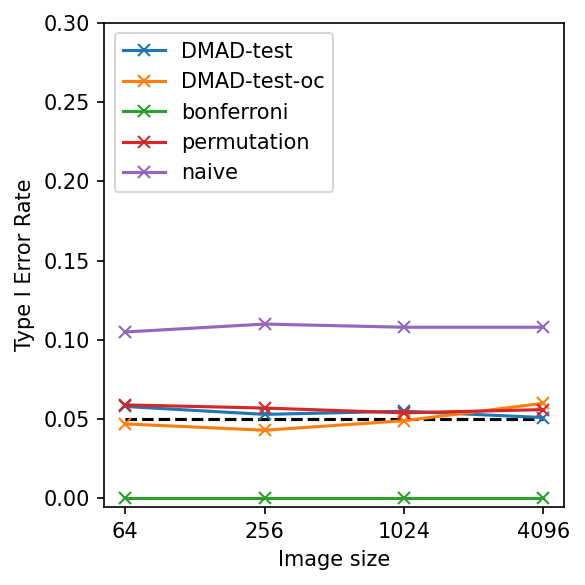

In [6]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import sicore
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import brentq

def compute_threshold(alpha, base, power):
    def target_func(th):
        log_bonf_alpha = np.log(alpha) - np.log(base) * power
        return np.log(2.0) + norm.logcdf(-th) - log_bonf_alpha
    th = brentq(target_func, 0.0, 1000.0)
    return th

def plot_pp(signal, image_size):
    files = glob.glob(f"./results/result_iid_{image_size}_signal{signal}*")

    pp_p_values = []
    naive_p_values = []
    oc_p_values = []
    permutation_p_values = []
    z_list = []


    for file in files:
        with open(file, "rb") as f:
            result_dict = pickle.load(f)
        cnt = 0
        for _ in range(len(result_dict["pp_p_values"])):
            if result_dict["pp_p_values"][_] is None or result_dict["naive_p_values"][_] is None or result_dict["oc_p_values"][_] is None or result_dict["z"][_] is None or result_dict["permutation_p_values"][_] is None:
                continue
            if cnt == 100:
                continue
            cnt += 1
            pp_p_values.append(result_dict["pp_p_values"][_])
            naive_p_values.append(result_dict["naive_p_values"][_])
            oc_p_values.append(result_dict["oc_p_values"][_])
            z_list.append(result_dict["z"][_])
            permutation_p_values.append(result_dict["permutation_p_values"][_])
    

    pp_p_values = np.array(pp_p_values).flatten()
    naive_p_values = np.array(naive_p_values).flatten()
    oc_p_values = np.array(oc_p_values).flatten()
    z_list = np.array(z_list).flatten()
    permutation_p_values = np.array(permutation_p_values).flatten()


    pp_power_list = []
    naive_power_list = []
    oc_power_list = []
    bonferroni_power_list = []
    permutation_power_list = []
    for i in range(10):
        pp_power_list.append(np.mean(pp_p_values[i*100:(i+1)*100] < 0.05))
        naive_power_list.append(np.mean(naive_p_values[i*100:(i+1)*100] < 0.05))
        oc_power_list.append(np.mean(oc_p_values[i*100:(i+1)*100] < 0.05))
        bonferroni_power_list.append(np.mean(z_list[i*100:(i+1)*100] > compute_threshold(0.05, 2, image_size**2)))
        permutation_power_list.append(np.mean(permutation_p_values[i*100:(i+1)*100] < 0.05))


    pp_power_list = np.array(pp_power_list)
    naive_power_list = np.array(naive_power_list)
    oc_power_list = np.array(oc_power_list)
    bonferroni_power_list = np.array(bonferroni_power_list)


    pp_power_mean = np.mean(pp_power_list)
    pp_power_std = np.std(pp_power_list)
    naive_power_mean = np.mean(naive_power_list)
    naive_power_std = np.std(naive_power_list)
    oc_power_mean = np.mean(oc_power_list)
    oc_power_std = np.std(oc_power_list)
    bonferroni_power_mean = np.mean(bonferroni_power_list)
    bonferroni_power_std = np.std(bonferroni_power_list)
    permutation_power_mean = np.mean(permutation_power_list)
    permutation_power_std = np.std(permutation_power_list)

    return naive_power_mean, bonferroni_power_mean, oc_power_mean, pp_power_mean, naive_power_std, bonferroni_power_std, oc_power_std, pp_power_std, permutation_power_mean, permutation_power_std
    

naive_reject_rate_mean_list = []
bonferroni_reject_rate_mean_list = []
oc_reject_rate_mean_list = []
pp_reject_rate_mean_list = []
permutation_reject_rate_mean_list = []

naive_reject_rate_std_list = []
bonferroni_reject_rate_std_list = []
oc_reject_rate_std_list = []
pp_reject_rate_std_list = []
permutation_reject_rate_std_list = []


for signal, image_size in zip([0, 0, 0, 0], [8, 16, 32, 64]):
    naive_reject_rate_mean, bonferroni_reject_rate_mean, oc_reject_rate_mean, pp_reject_rate_mean, naive_reject_rate_std, bonferroni_reject_rate_std, oc_reject_rate_std, pp_reject_rate_std, permutation_reject_rate_mean, permutation_reject_rate_std \
        = plot_pp(signal=signal, image_size=image_size)

    naive_reject_rate_mean_list.append(naive_reject_rate_mean)
    bonferroni_reject_rate_mean_list.append(bonferroni_reject_rate_mean)
    oc_reject_rate_mean_list.append(oc_reject_rate_mean)
    pp_reject_rate_mean_list.append(pp_reject_rate_mean)
    naive_reject_rate_std_list.append(naive_reject_rate_std)
    bonferroni_reject_rate_std_list.append(bonferroni_reject_rate_std)
    oc_reject_rate_std_list.append(oc_reject_rate_std)
    pp_reject_rate_std_list.append(pp_reject_rate_std)
    permutation_reject_rate_mean_list.append(permutation_reject_rate_mean)
    permutation_reject_rate_std_list.append(permutation_reject_rate_std)
    

fig = plt.figure(figsize=(4, 4), dpi=150)
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [0.05, 0.05, 0.05, 0.05], linestyle='dashed', color='black')
ax.plot([1, 2, 3, 4], pp_reject_rate_mean_list, label='DMAD-test', marker='x')
ax.plot([1, 2, 3, 4], oc_reject_rate_mean_list, label='DMAD-test-oc', marker='x')
ax.plot([1, 2, 3, 4], bonferroni_reject_rate_mean_list, label='bonferroni', marker='x')
ax.plot([1, 2, 3, 4], permutation_reject_rate_mean_list, label='permutation', marker='x')
ax.plot([1, 2, 3, 4], naive_reject_rate_mean_list, label='naive', marker='x')

ax.set_yticks(np.arange(0, 0.35, 0.05))
ax.set_xticks([1, 2, 3, 4]) 
ax.set_xticklabels(["64", "256", "1024", "4096"])
ax.set_xlabel('Image size')
ax.set_ylabel('Type I Error Rate')
ax.legend(loc='upper left')
plt.savefig('results/fig/iid_fpr.pdf')
plt.show()

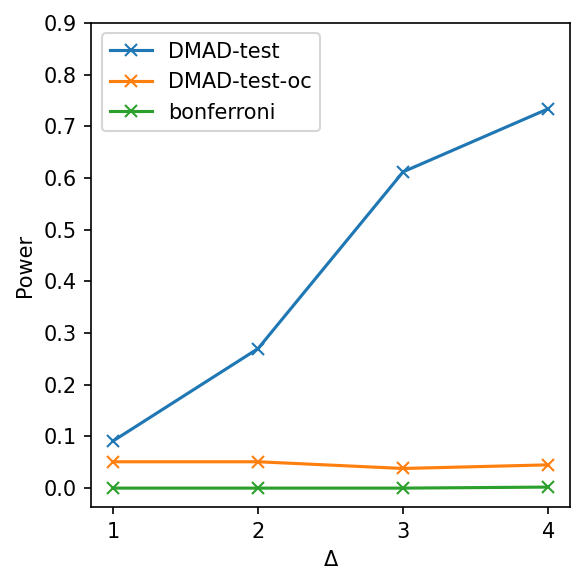

In [7]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import sicore
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import brentq

def compute_threshold(alpha, base, power):
    def target_func(th):
        log_bonf_alpha = np.log(alpha) - np.log(base) * power
        return np.log(2.0) + norm.logcdf(-th) - log_bonf_alpha
    th = brentq(target_func, 0.0, 1000.0)
    return th

def plot_pp(signal, image_size):
    files = glob.glob(f"./results/result_iid_{image_size}_signal{signal}*")

    pp_p_values = []
    naive_p_values = []
    oc_p_values = []
    z_list = []

    for file in files:
        with open(file, "rb") as f:
            result_dict = pickle.load(f)
        cnt = 0
        for _ in range(len(result_dict["pp_p_values"])):
            if result_dict["pp_p_values"][_] is None and result_dict["naive_p_values"][_] is None and result_dict["oc_p_values"][_] is None and result_dict["z"][_] is None:        
                continue            
            if cnt == 100:
                continue
            cnt += 1
            pp_p_values.append(result_dict["pp_p_values"][_])
            naive_p_values.append(result_dict["naive_p_values"][_])
            oc_p_values.append(result_dict["oc_p_values"][_])
            z_list.append(result_dict["z"][_])

    pp_p_values = np.array(pp_p_values).flatten()
    naive_p_values = np.array(naive_p_values).flatten()
    oc_p_values = np.array(oc_p_values).flatten()
    z_list = np.array(z_list).flatten()
    
    pp_power_list = []
    naive_power_list = []
    oc_power_list = []
    bonferroni_power_list = []
    for i in range(10):
        pp_power_list.append(np.mean(pp_p_values[i*100:(i+1)*100] < 0.05))
        naive_power_list.append(np.mean(naive_p_values[i*100:(i+1)*100] < 0.05))
        oc_power_list.append(np.mean(oc_p_values[i*100:(i+1)*100] < 0.05))
        bonferroni_power_list.append(np.mean(z_list[i*100:(i+1)*100] > compute_threshold(0.05, 2, image_size**2)))
    
    pp_power_list = np.array(pp_power_list)
    naive_power_list = np.array(naive_power_list)
    oc_power_list = np.array(oc_power_list)
    bonferroni_power_list = np.array(bonferroni_power_list)
    pp_power_mean = np.mean(pp_power_list)
    pp_power_std = np.std(pp_power_list)
    naive_power_mean = np.mean(naive_power_list)
    naive_power_std = np.std(naive_power_list)
    oc_power_mean = np.mean(oc_power_list)
    oc_power_std = np.std(oc_power_list)
    bonferroni_power_mean = np.mean(bonferroni_power_list)
    bonferroni_power_std = np.std(bonferroni_power_list)
    
    return naive_power_mean, bonferroni_power_mean, oc_power_mean, pp_power_mean, naive_power_std, bonferroni_power_std, oc_power_std, pp_power_std
    

naive_reject_rate_mean_list = []
bonferroni_reject_rate_mean_list = []
oc_reject_rate_mean_list = []
pp_reject_rate_mean_list = []

naive_reject_rate_std_list = []
bonferroni_reject_rate_std_list = []
oc_reject_rate_std_list = []
pp_reject_rate_std_list = []


for signal, image_size in zip([1, 2, 3, 4], [16, 16, 16, 16]):
    naive_reject_rate_mean, bonferroni_reject_rate_mean, oc_reject_rate_mean, pp_reject_rate_mean, naive_reject_rate_std, bonferroni_reject_rate_std, oc_reject_rate_std, pp_reject_rate_std \
        = plot_pp(signal=signal, image_size=image_size)

    naive_reject_rate_mean_list.append(naive_reject_rate_mean)
    bonferroni_reject_rate_mean_list.append(bonferroni_reject_rate_mean)
    oc_reject_rate_mean_list.append(oc_reject_rate_mean)
    pp_reject_rate_mean_list.append(pp_reject_rate_mean)
    naive_reject_rate_std_list.append(naive_reject_rate_std)
    bonferroni_reject_rate_std_list.append(bonferroni_reject_rate_std)
    oc_reject_rate_std_list.append(oc_reject_rate_std)
    pp_reject_rate_std_list.append(pp_reject_rate_std)

fig = plt.figure(figsize=(4, 4), dpi=150)
ax = fig.add_subplot(111)

ax.plot([1, 2, 3, 4], pp_reject_rate_mean_list, label='DMAD-test', marker='x')
ax.plot([1, 2, 3, 4], oc_reject_rate_mean_list, label='DMAD-test-oc', marker='x')
ax.plot([1, 2, 3, 4], bonferroni_reject_rate_mean_list, label='bonferroni', marker='x')

ax.set_yticks(np.arange(0, 1.0, 0.1))

ax.set_xticks([1, 2, 3, 4]) 
ax.set_xticklabels(["1", "2", "3", "4"])
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel('Power')
ax.legend()
plt.savefig('results/fig/iid_power.pdf')
plt.show()

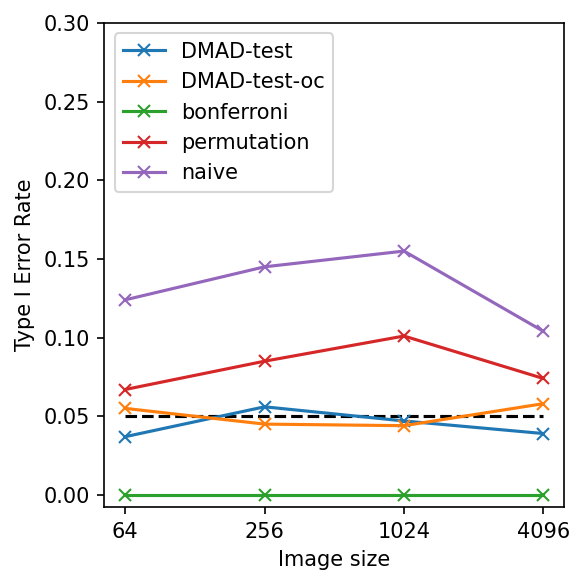

In [8]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import sicore
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import brentq

def compute_threshold(alpha, base, power):
    def target_func(th):
        log_bonf_alpha = np.log(alpha) - np.log(base) * power
        return np.log(2.0) + norm.logcdf(-th) - log_bonf_alpha
    th = brentq(target_func, 0.0, 1000.0)
    return th

def plot_pp(signal, image_size):
    files = glob.glob(f"./results/result_corr_{image_size}_signal{signal}*")

    pp_p_values = []
    naive_p_values = []
    oc_p_values = []
    permutation_p_values = []
    z_list = []


    for file in files:
        with open(file, "rb") as f:
            result_dict = pickle.load(f)
        cnt = 0
        for _ in range(len(result_dict["pp_p_values"])):
            if result_dict["pp_p_values"][_] is None or result_dict["naive_p_values"][_] is None or result_dict["oc_p_values"][_] is None or result_dict["z"][_] is None or result_dict["permutation_p_values"][_] is None:
                continue
            if cnt == 100:
                continue
            cnt += 1
            pp_p_values.append(result_dict["pp_p_values"][_])
            naive_p_values.append(result_dict["naive_p_values"][_])
            oc_p_values.append(result_dict["oc_p_values"][_])
            z_list.append(result_dict["z"][_])
            permutation_p_values.append(result_dict["permutation_p_values"][_])
    

    pp_p_values = np.array(pp_p_values).flatten()
    naive_p_values = np.array(naive_p_values).flatten()
    oc_p_values = np.array(oc_p_values).flatten()
    z_list = np.array(z_list).flatten()
    permutation_p_values = np.array(permutation_p_values).flatten()


    pp_power_list = []
    naive_power_list = []
    oc_power_list = []
    bonferroni_power_list = []
    permutation_power_list = []
    for i in range(10):
        pp_power_list.append(np.mean(pp_p_values[i*100:(i+1)*100] < 0.05))
        naive_power_list.append(np.mean(naive_p_values[i*100:(i+1)*100] < 0.05))
        oc_power_list.append(np.mean(oc_p_values[i*100:(i+1)*100] < 0.05))
        bonferroni_power_list.append(np.mean(z_list[i*100:(i+1)*100] > compute_threshold(0.05, 2, image_size**2)))
        permutation_power_list.append(np.mean(permutation_p_values[i*100:(i+1)*100] < 0.05))


    pp_power_list = np.array(pp_power_list)
    naive_power_list = np.array(naive_power_list)
    oc_power_list = np.array(oc_power_list)
    bonferroni_power_list = np.array(bonferroni_power_list)


    pp_power_mean = np.mean(pp_power_list)
    pp_power_std = np.std(pp_power_list)
    naive_power_mean = np.mean(naive_power_list)
    naive_power_std = np.std(naive_power_list)
    oc_power_mean = np.mean(oc_power_list)
    oc_power_std = np.std(oc_power_list)
    bonferroni_power_mean = np.mean(bonferroni_power_list)
    bonferroni_power_std = np.std(bonferroni_power_list)
    permutation_power_mean = np.mean(permutation_power_list)
    permutation_power_std = np.std(permutation_power_list)

    return naive_power_mean, bonferroni_power_mean, oc_power_mean, pp_power_mean, naive_power_std, bonferroni_power_std, oc_power_std, pp_power_std, permutation_power_mean, permutation_power_std
    

naive_reject_rate_mean_list = []
bonferroni_reject_rate_mean_list = []
oc_reject_rate_mean_list = []
pp_reject_rate_mean_list = []
permutation_reject_rate_mean_list = []

naive_reject_rate_std_list = []
bonferroni_reject_rate_std_list = []
oc_reject_rate_std_list = []
pp_reject_rate_std_list = []
permutation_reject_rate_std_list = []


for signal, image_size in zip([0, 0, 0, 0], [8, 16, 32, 64]):
    naive_reject_rate_mean, bonferroni_reject_rate_mean, oc_reject_rate_mean, pp_reject_rate_mean, naive_reject_rate_std, bonferroni_reject_rate_std, oc_reject_rate_std, pp_reject_rate_std, permutation_reject_rate_mean, permutation_reject_rate_std \
        = plot_pp(signal=signal, image_size=image_size)

    naive_reject_rate_mean_list.append(naive_reject_rate_mean)
    bonferroni_reject_rate_mean_list.append(bonferroni_reject_rate_mean)
    oc_reject_rate_mean_list.append(oc_reject_rate_mean)
    pp_reject_rate_mean_list.append(pp_reject_rate_mean)
    naive_reject_rate_std_list.append(naive_reject_rate_std)
    bonferroni_reject_rate_std_list.append(bonferroni_reject_rate_std)
    oc_reject_rate_std_list.append(oc_reject_rate_std)
    pp_reject_rate_std_list.append(pp_reject_rate_std)
    permutation_reject_rate_mean_list.append(permutation_reject_rate_mean)
    permutation_reject_rate_std_list.append(permutation_reject_rate_std)
    

fig = plt.figure(figsize=(4, 4), dpi=150)
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [0.05, 0.05, 0.05, 0.05], linestyle='dashed', color='black')
ax.plot([1, 2, 3, 4], pp_reject_rate_mean_list, label='DMAD-test', marker='x')
ax.plot([1, 2, 3, 4], oc_reject_rate_mean_list, label='DMAD-test-oc', marker='x')
ax.plot([1, 2, 3, 4], bonferroni_reject_rate_mean_list, label='bonferroni', marker='x')
ax.plot([1, 2, 3, 4], permutation_reject_rate_mean_list, label='permutation', marker='x')
ax.plot([1, 2, 3, 4], naive_reject_rate_mean_list, label='naive', marker='x')

ax.set_yticks(np.arange(0, 0.35, 0.05))
ax.set_xticks([1, 2, 3, 4]) 
ax.set_xticklabels(["64", "256", "1024", "4096"])
ax.set_xlabel('Image size')
ax.set_ylabel('Type I Error Rate')
ax.legend(loc='upper left')
plt.savefig('results/fig/corr_fpr.pdf')
plt.show()

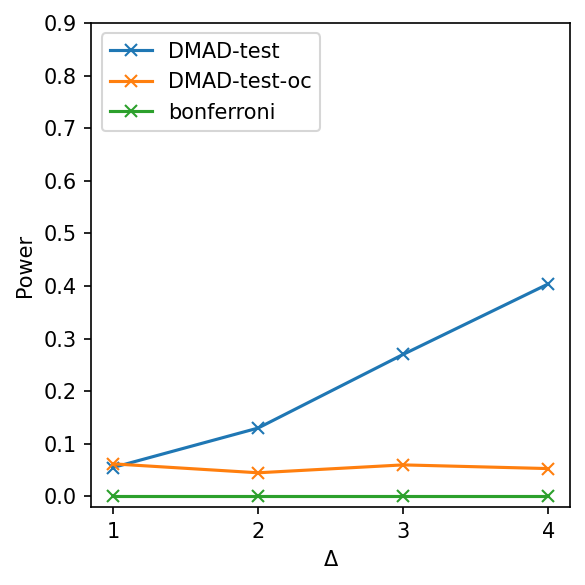

In [9]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import sicore
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import brentq

def compute_threshold(alpha, base, power):
    def target_func(th):
        log_bonf_alpha = np.log(alpha) - np.log(base) * power
        return np.log(2.0) + norm.logcdf(-th) - log_bonf_alpha
    th = brentq(target_func, 0.0, 1000.0)
    return th

def plot_pp(signal, image_size):
    files = glob.glob(f"./results/result_corr_{image_size}_signal{signal}*")

    pp_p_values = []
    naive_p_values = []
    oc_p_values = []
    z_list = []

    for file in files:
        with open(file, "rb") as f:
            result_dict = pickle.load(f)
        cnt = 0
        for _ in range(len(result_dict["pp_p_values"])):
            if result_dict["pp_p_values"][_] is None and result_dict["naive_p_values"][_] is None and result_dict["oc_p_values"][_] is None and result_dict["z"][_] is None:        
                continue            
            if cnt == 100:
                continue
            cnt += 1
            pp_p_values.append(result_dict["pp_p_values"][_])
            naive_p_values.append(result_dict["naive_p_values"][_])
            oc_p_values.append(result_dict["oc_p_values"][_])
            z_list.append(result_dict["z"][_])

    pp_p_values = np.array(pp_p_values).flatten()
    naive_p_values = np.array(naive_p_values).flatten()
    oc_p_values = np.array(oc_p_values).flatten()
    z_list = np.array(z_list).flatten()
    
    pp_power_list = []
    naive_power_list = []
    oc_power_list = []
    bonferroni_power_list = []
    for i in range(10):
        pp_power_list.append(np.mean(pp_p_values[i*100:(i+1)*100] < 0.05))
        naive_power_list.append(np.mean(naive_p_values[i*100:(i+1)*100] < 0.05))
        oc_power_list.append(np.mean(oc_p_values[i*100:(i+1)*100] < 0.05))
        bonferroni_power_list.append(np.mean(z_list[i*100:(i+1)*100] > compute_threshold(0.05, 2, image_size**2)))
    
    pp_power_list = np.array(pp_power_list)
    naive_power_list = np.array(naive_power_list)
    oc_power_list = np.array(oc_power_list)
    bonferroni_power_list = np.array(bonferroni_power_list)
    pp_power_mean = np.mean(pp_power_list)
    pp_power_std = np.std(pp_power_list)
    naive_power_mean = np.mean(naive_power_list)
    naive_power_std = np.std(naive_power_list)
    oc_power_mean = np.mean(oc_power_list)
    oc_power_std = np.std(oc_power_list)
    bonferroni_power_mean = np.mean(bonferroni_power_list)
    bonferroni_power_std = np.std(bonferroni_power_list)
    
    return naive_power_mean, bonferroni_power_mean, oc_power_mean, pp_power_mean, naive_power_std, bonferroni_power_std, oc_power_std, pp_power_std
    

naive_reject_rate_mean_list = []
bonferroni_reject_rate_mean_list = []
oc_reject_rate_mean_list = []
pp_reject_rate_mean_list = []

naive_reject_rate_std_list = []
bonferroni_reject_rate_std_list = []
oc_reject_rate_std_list = []
pp_reject_rate_std_list = []


for signal, image_size in zip([1, 2, 3, 4], [16, 16, 16, 16]):
    naive_reject_rate_mean, bonferroni_reject_rate_mean, oc_reject_rate_mean, pp_reject_rate_mean, naive_reject_rate_std, bonferroni_reject_rate_std, oc_reject_rate_std, pp_reject_rate_std \
        = plot_pp(signal=signal, image_size=image_size)

    naive_reject_rate_mean_list.append(naive_reject_rate_mean)
    bonferroni_reject_rate_mean_list.append(bonferroni_reject_rate_mean)
    oc_reject_rate_mean_list.append(oc_reject_rate_mean)
    pp_reject_rate_mean_list.append(pp_reject_rate_mean)
    naive_reject_rate_std_list.append(naive_reject_rate_std)
    bonferroni_reject_rate_std_list.append(bonferroni_reject_rate_std)
    oc_reject_rate_std_list.append(oc_reject_rate_std)
    pp_reject_rate_std_list.append(pp_reject_rate_std)

fig = plt.figure(figsize=(4, 4), dpi=150)
ax = fig.add_subplot(111)

ax.plot([1, 2, 3, 4], pp_reject_rate_mean_list, label='DMAD-test', marker='x')
ax.plot([1, 2, 3, 4], oc_reject_rate_mean_list, label='DMAD-test-oc', marker='x')
ax.plot([1, 2, 3, 4], bonferroni_reject_rate_mean_list, label='bonferroni', marker='x')

ax.set_yticks(np.arange(0, 1.0, 0.1))

ax.set_xticks([1, 2, 3, 4]) 
ax.set_xticklabels(["1", "2", "3", "4"])
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel('Power')
ax.legend(loc='upper left')
plt.savefig('results/fig/corr_power.pdf')
plt.show()